# Laboratorium 1


### Konfiguracja

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random
import math

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [32]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


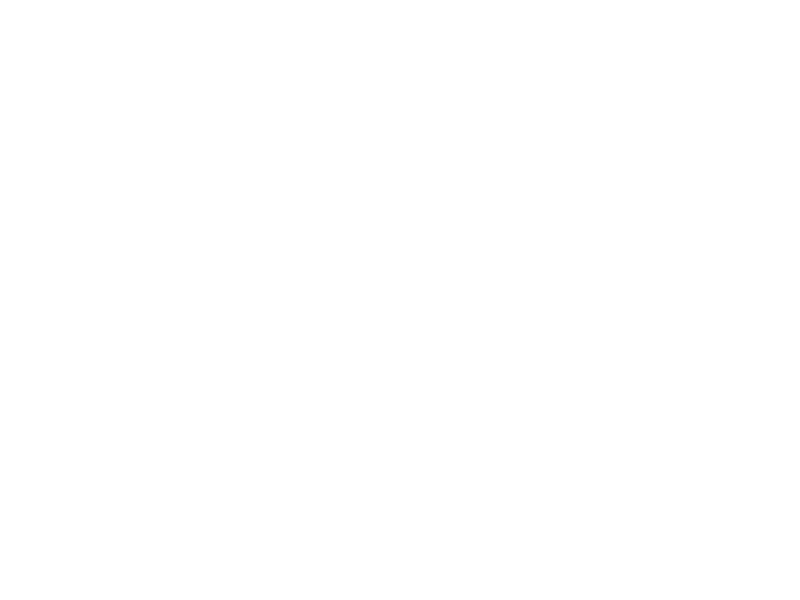

In [34]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie


Funkcje pomocnicze

In [36]:
rang = lambda point_range: random.uniform(-point_range, point_range)


def det_2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])


def det_1(a, b, c):
    return a[0] * b[1] * 1 + a[1] * 1 * c[0] + 1 * b[0] * c[1] - 1 * b[1] * c[0] - 1 * c[1] * a[0] - 1 * a[1] * b[0]


def rand_list(n, point_range):
    return [[rang(point_range), rang(point_range)] for i in range(n)]


def point_on_cycle(R, t):
    return [R * math.cos((math.pi / 2) * t), R * math.sin((math.pi / 2) * t)]


def rand_cycle_list(n, R):
    return [point_on_cycle(R, random.uniform(0, 4)) for i in range(n)]


def rand_linear(n, point_range, pa, pb):
    result = []
    for i in range(n):
        x = rang(point_range)
        y = (pa[1]-pb[1])/(pa[0]-pb[0])*x+(pa[1]-(pa[1]-pb[1])/(pa[0]-pb[0])*pa[0])
        result.append([x, y])
    return result

### zad 1 a)

<IPython.core.display.Javascript object>


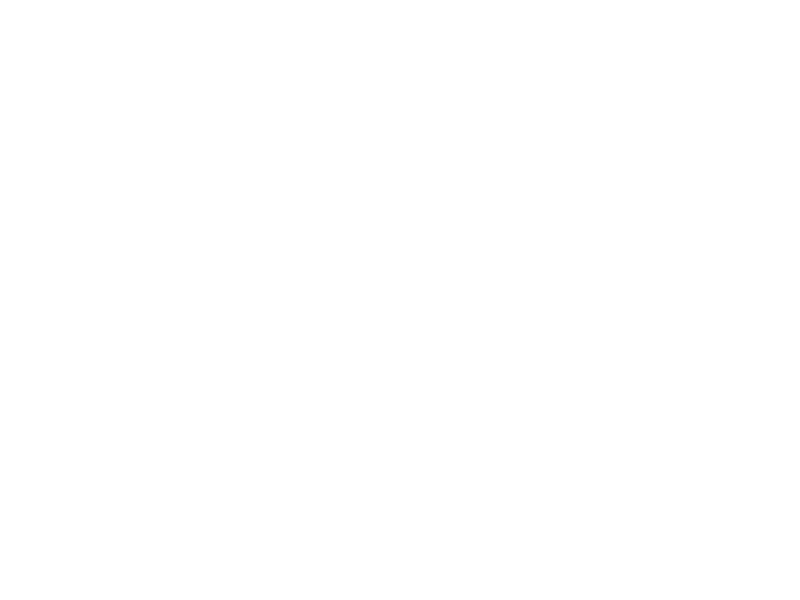

In [38]:
%matplotlib notebook

a = rand_list(10**5, 1000)
Plot([PointsCollection(a)]).draw()

### zad 1 b)

<IPython.core.display.Javascript object>


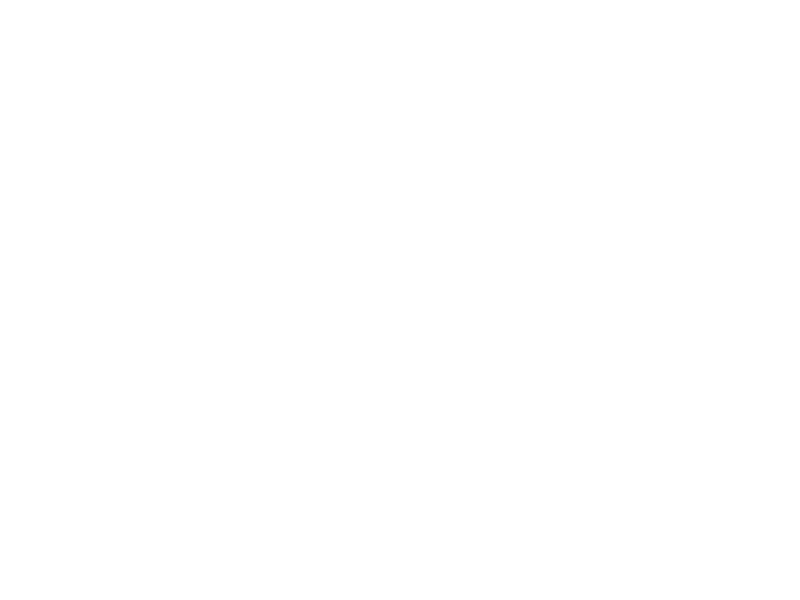

In [40]:
%matplotlib notebook
b = rand_list(10**5, 10**14)
Plot([PointsCollection(b)]).draw()

### zad 1 c)

<IPython.core.display.Javascript object>


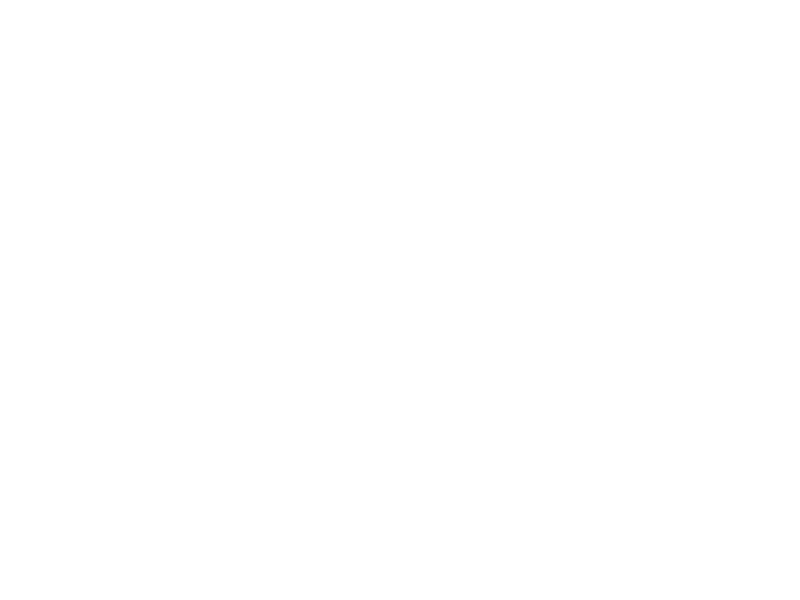

In [41]:
%matplotlib notebook

c = rand_cycle_list(1000, 100)
Plot([PointsCollection(c)]).draw()


### zad 1 d)

<IPython.core.display.Javascript object>


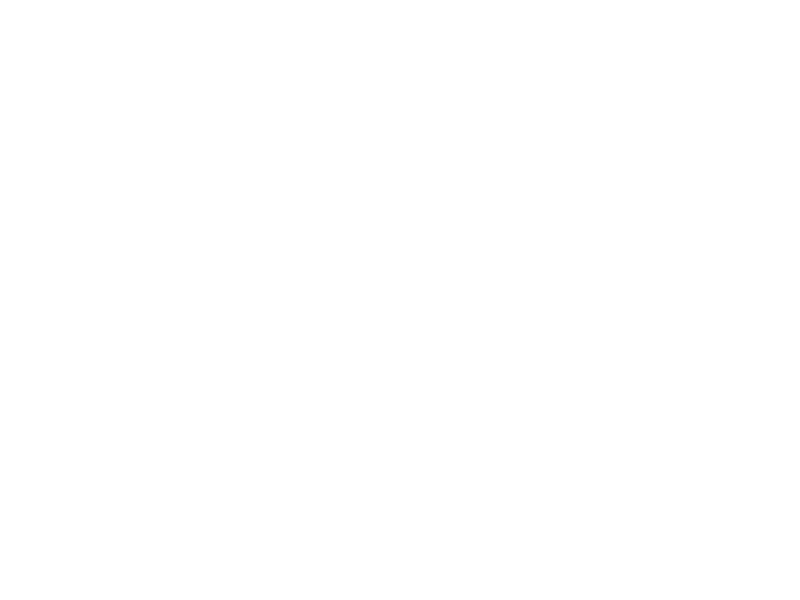

In [42]:
%matplotlib notebook

d = rand_linear(1000, 1000, [-1.0, 0.0], [1.0, 0.1])
Plot([PointsCollection(d)]).draw()


### zad 3

In [43]:
%matplotlib notebook

def classify(points, det, e=10**-14, a=(-1.0,0.0), b=(1.0,0.1)):
    result = {
        'left':[],
        'right':[],
        'collinear':[]
    }
    for p in points:
        if det(a,b,p) < -e:
            result['left'].append(p)
        elif det(a,b,p) > e:
            result['right'].append(p)
        else:
            result['collinear'].append(p)
    return result

In [44]:
def show_result(points, det, e=10**-14):
    result = classify(points,det,e)
    Plot([PointsCollection(result['left'], color = 'blue'),
          PointsCollection(result['right'], color = 'red'),
          PointsCollection(result['collinear'], color = 'green')], 
    ).draw()
    print("Left: ",len(result['left']))
    print("Right: ",len(result['right']))
    print("Collinear: ",len(result['collinear']))
    

<IPython.core.display.Javascript object>


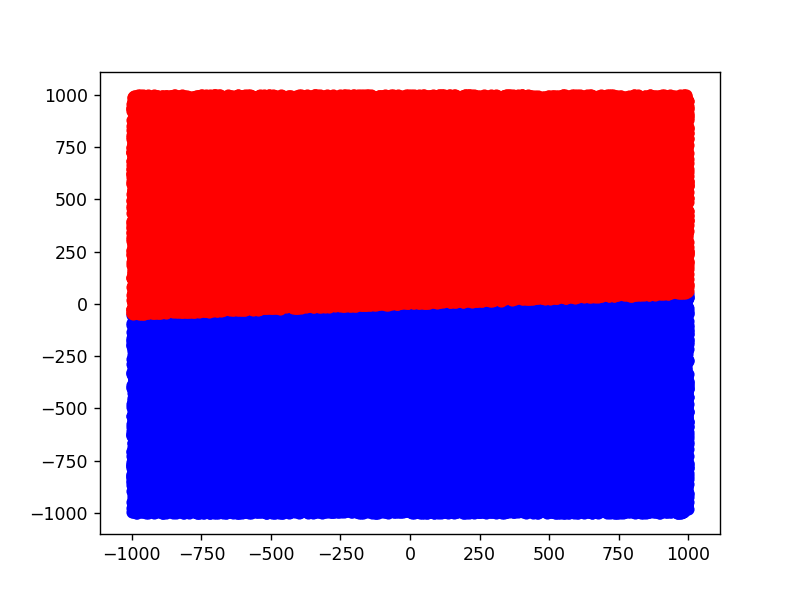

Left:  49754
Right:  50246
Collinear:  0


In [69]:
%matplotlib notebook
show_result(a,det_1)

<IPython.core.display.Javascript object>


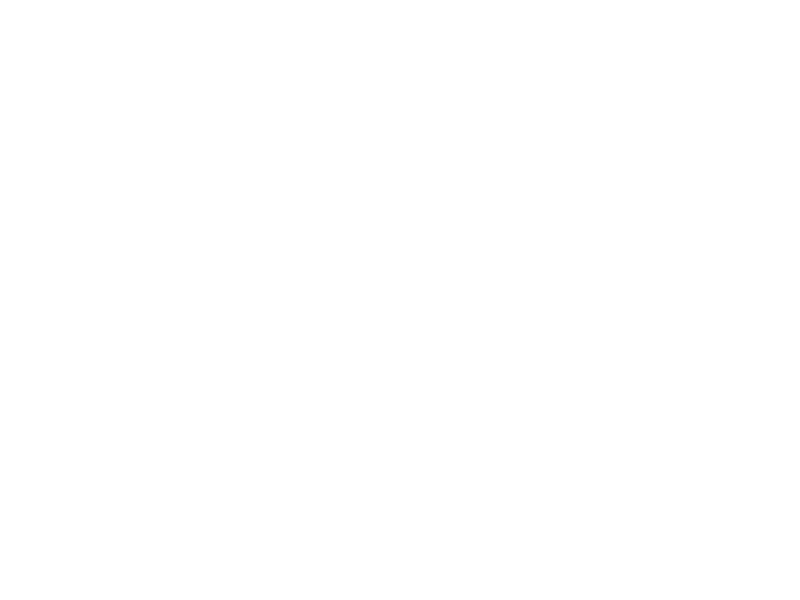

Left:  49754
Right:  50246
Collinear:  0


In [46]:
%matplotlib notebook
show_result(a,det_2)

<IPython.core.display.Javascript object>


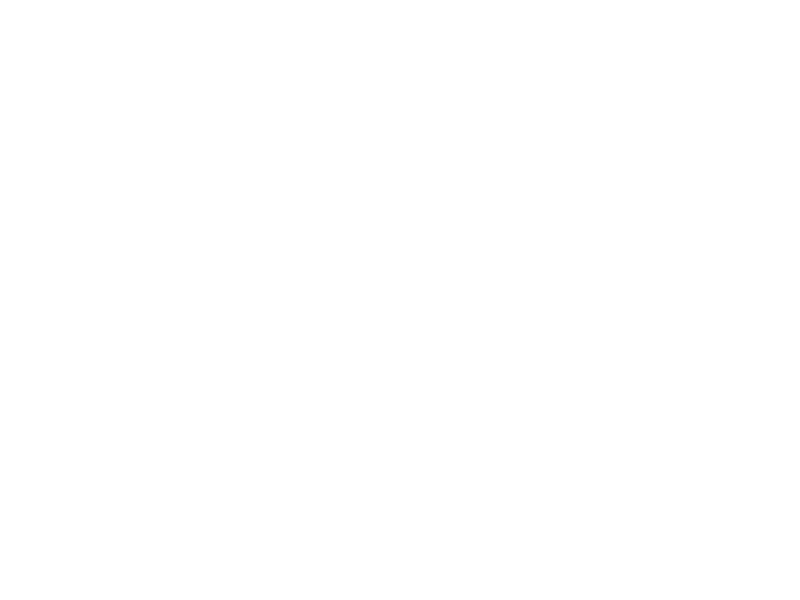

Left:  50126
Right:  49874
Collinear:  0


In [47]:
%matplotlib notebook
show_result(b,det_1)

<IPython.core.display.Javascript object>


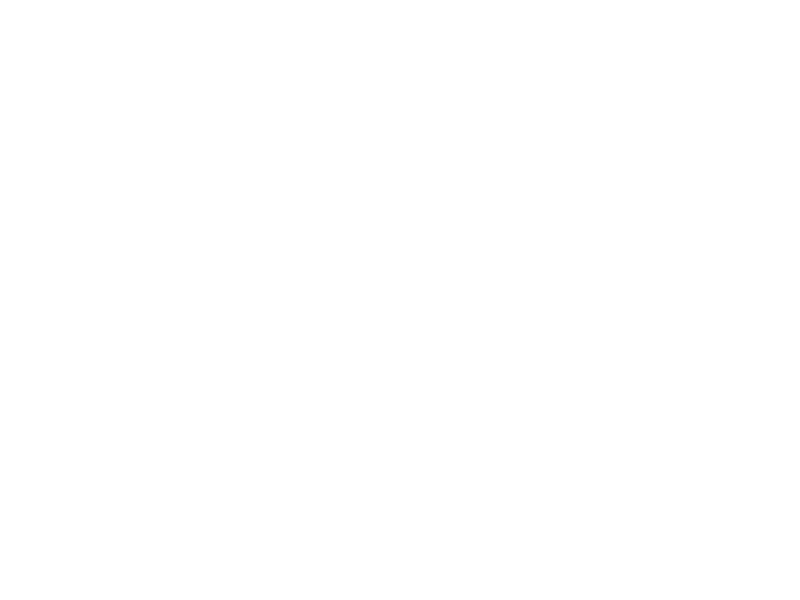

Left:  50122
Right:  49874
Collinear:  4


In [48]:
%matplotlib notebook
show_result(b,det_2)

<IPython.core.display.Javascript object>


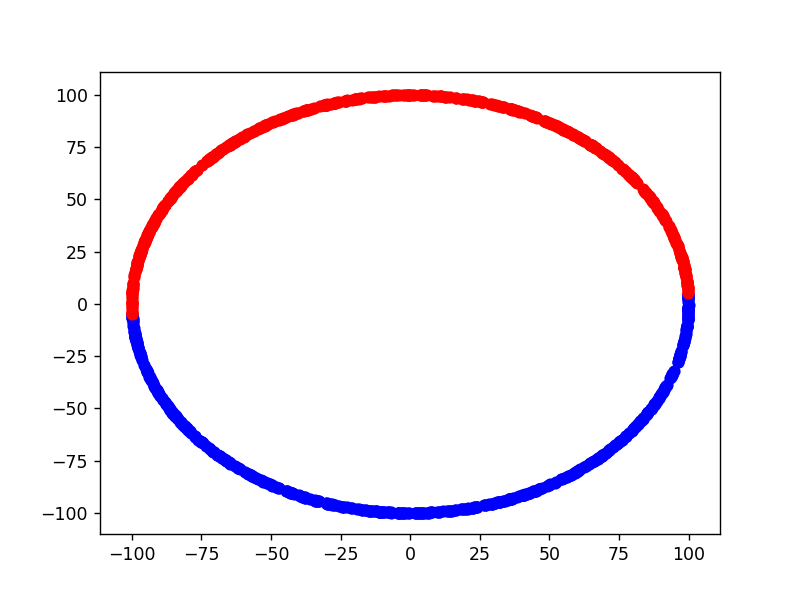

Left:  501
Right:  499
Collinear:  0


In [70]:
%matplotlib notebook
show_result(c,det_1)

<IPython.core.display.Javascript object>


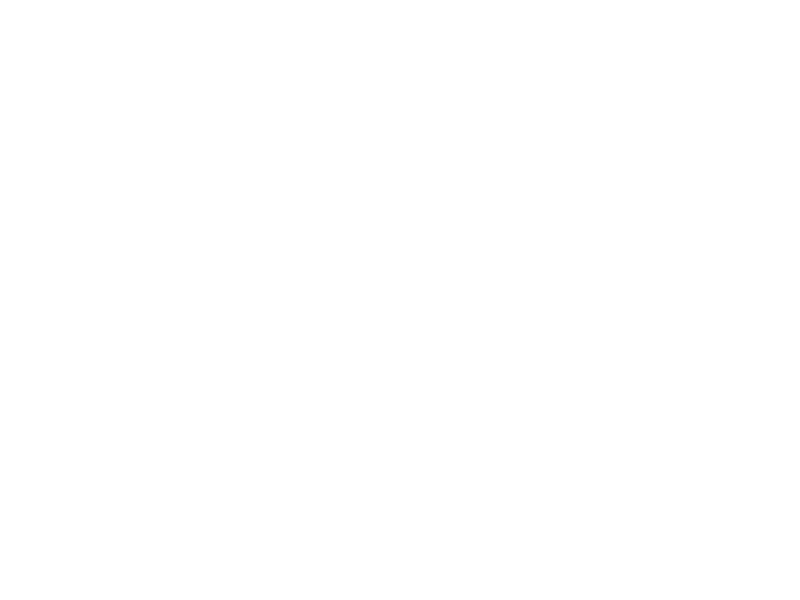

Left:  501
Right:  499
Collinear:  0


In [50]:
%matplotlib notebook
show_result(c,det_2)

<IPython.core.display.Javascript object>


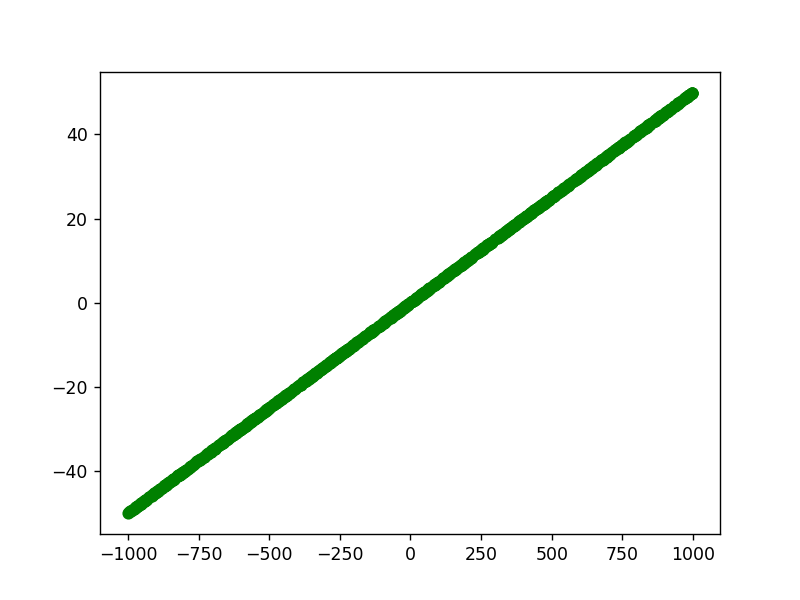

Left:  0
Right:  0
Collinear:  1000


In [71]:
%matplotlib notebook
show_result(d,det_1)

<IPython.core.display.Javascript object>


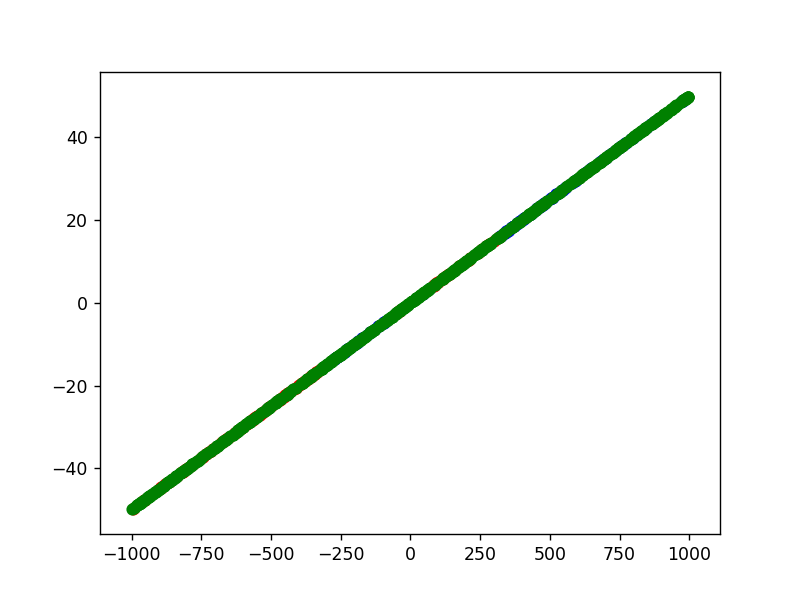

Left:  146
Right:  152
Collinear:  702


In [72]:
%matplotlib notebook
show_result(d,det_2)

<IPython.core.display.Javascript object>


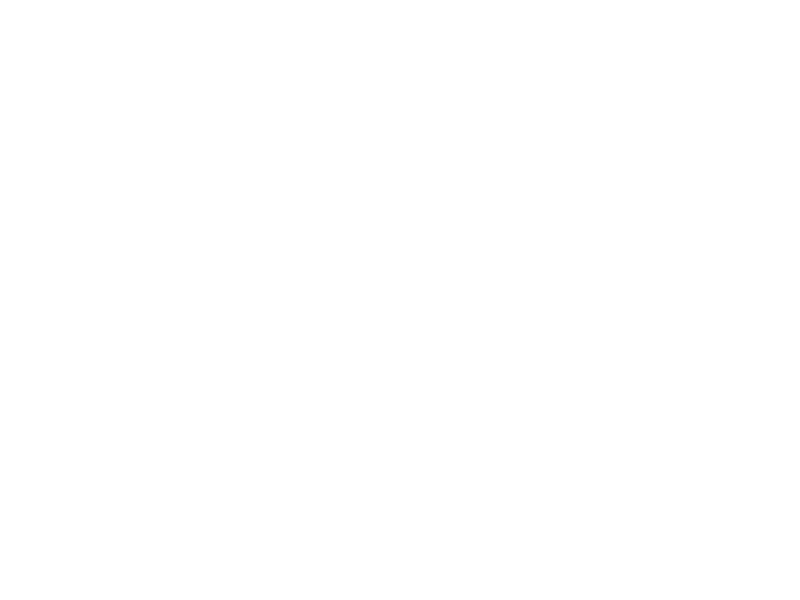

Left:  49754
Right:  50246
Collinear:  0


In [53]:
%matplotlib notebook
show_result(a,det_1, 0)

<IPython.core.display.Javascript object>


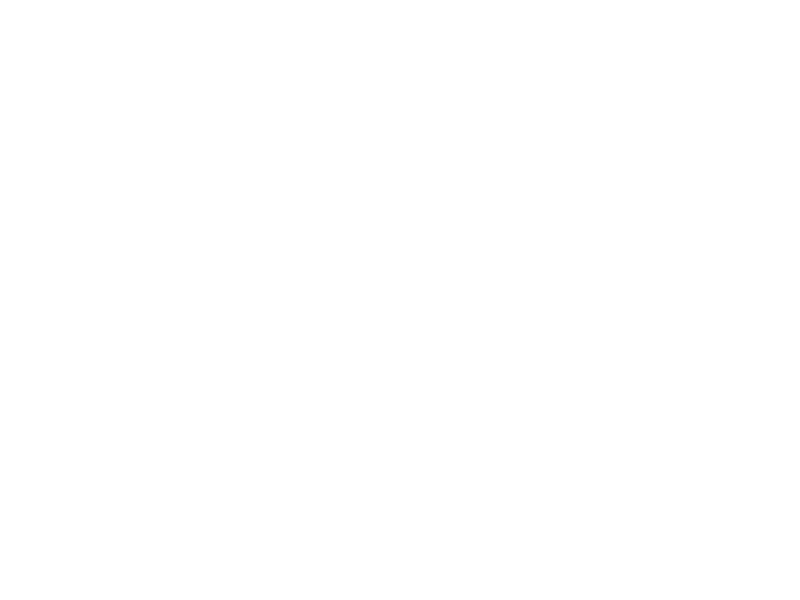

Left:  49754
Right:  50246
Collinear:  0


In [54]:
%matplotlib notebook
show_result(a,det_2, 0)

<IPython.core.display.Javascript object>


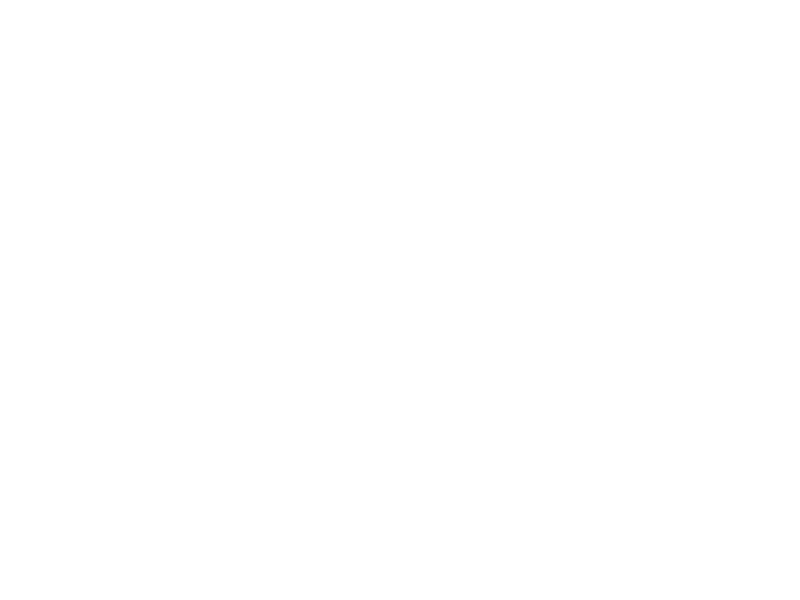

Left:  50126
Right:  49874
Collinear:  0


In [55]:
%matplotlib notebook
show_result(b,det_1, 0)

<IPython.core.display.Javascript object>


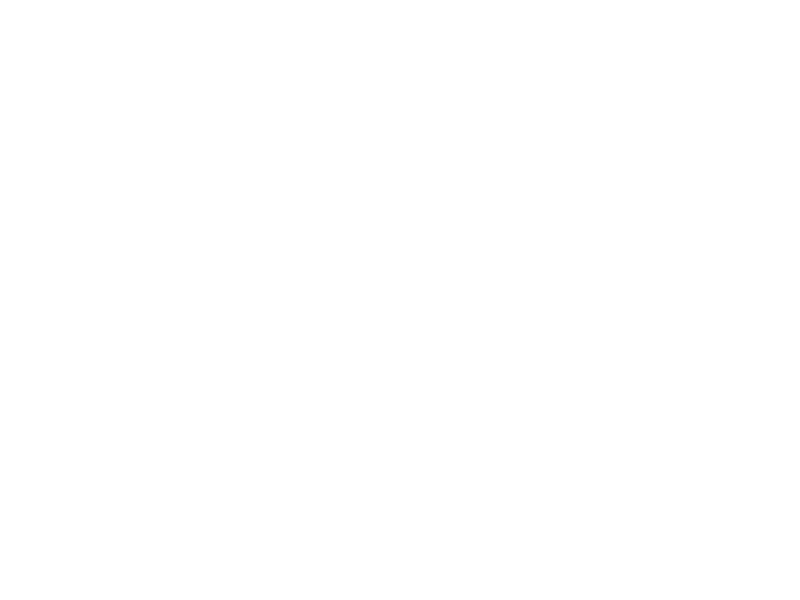

Left:  50122
Right:  49874
Collinear:  4


In [56]:
%matplotlib notebook
show_result(b,det_2, 0)

<IPython.core.display.Javascript object>


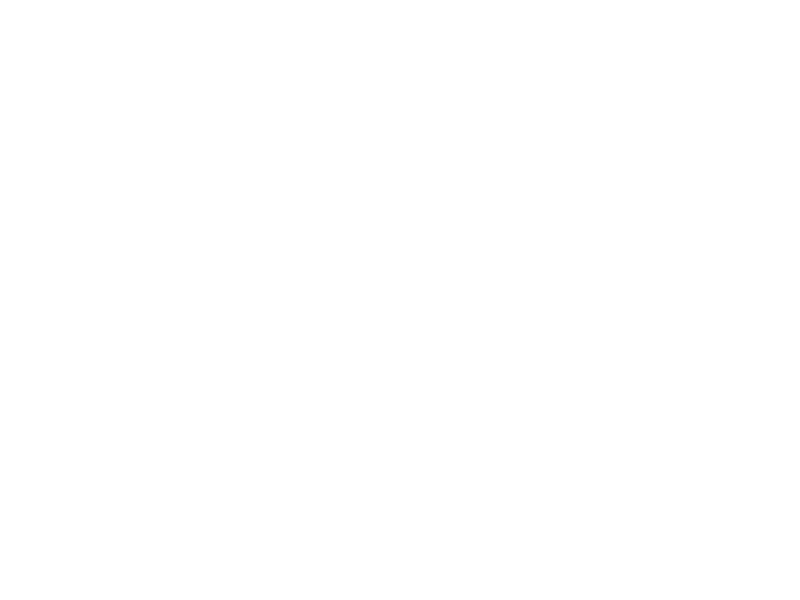

Left:  501
Right:  499
Collinear:  0


In [57]:
%matplotlib notebook
show_result(c,det_1, 0)

<IPython.core.display.Javascript object>


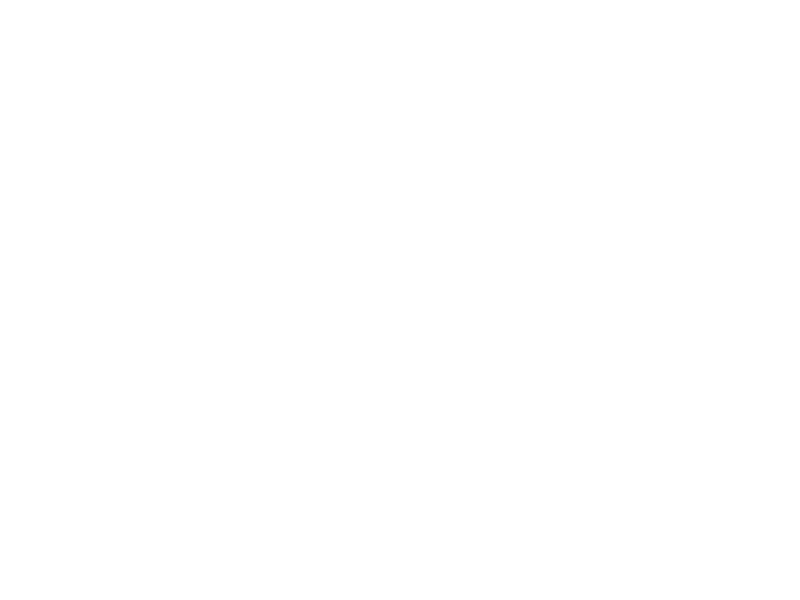

Left:  501
Right:  499
Collinear:  0


In [58]:
%matplotlib notebook
show_result(c,det_2, 0)

<IPython.core.display.Javascript object>


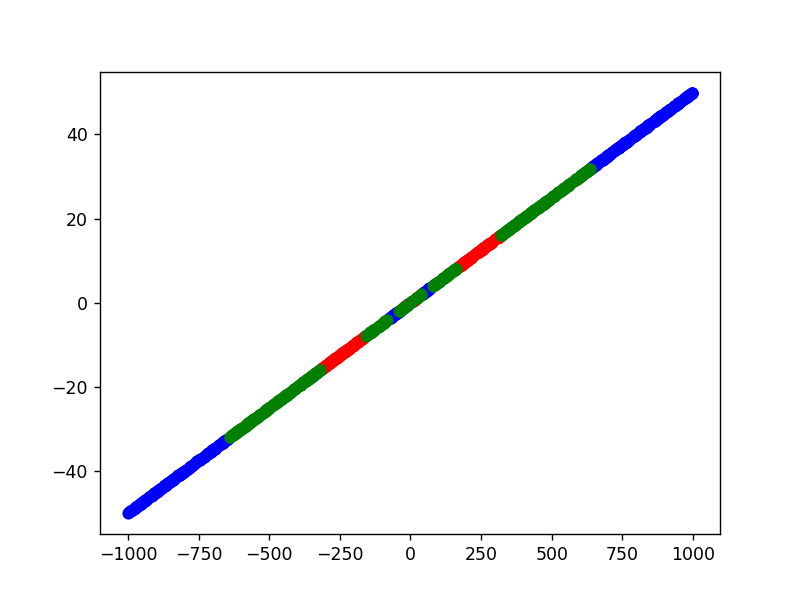

Left:  375
Right:  185
Collinear:  440


In [73]:
%matplotlib notebook
show_result(d,det_1, 0)

<IPython.core.display.Javascript object>


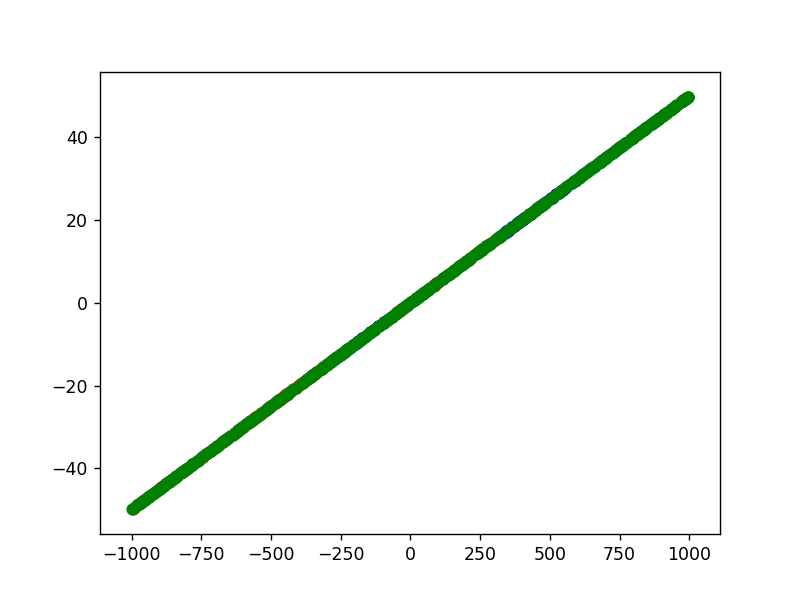

Left:  154
Right:  161
Collinear:  685


In [74]:
%matplotlib notebook
show_result(d,det_2, 0)

<IPython.core.display.Javascript object>


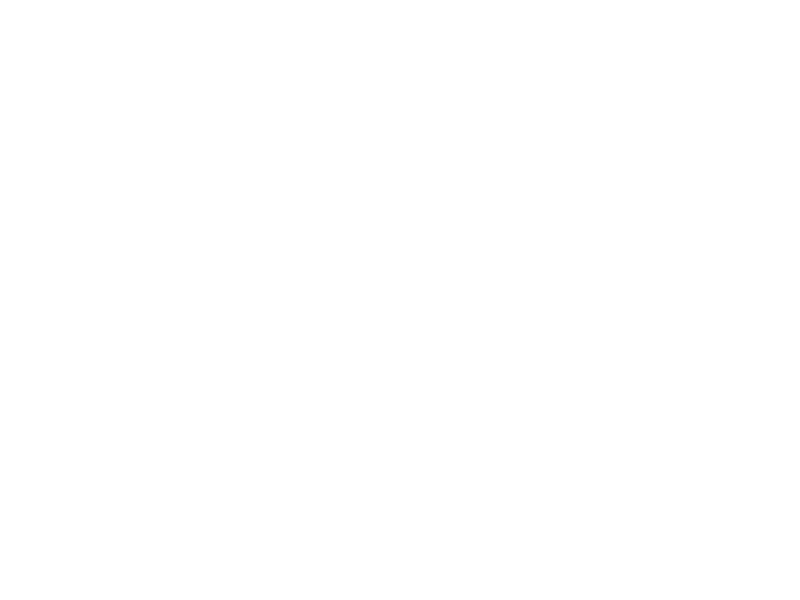

Left:  49754
Right:  50246
Collinear:  0


In [61]:
%matplotlib notebook
show_result(a,det_1, 10**-6)

<IPython.core.display.Javascript object>


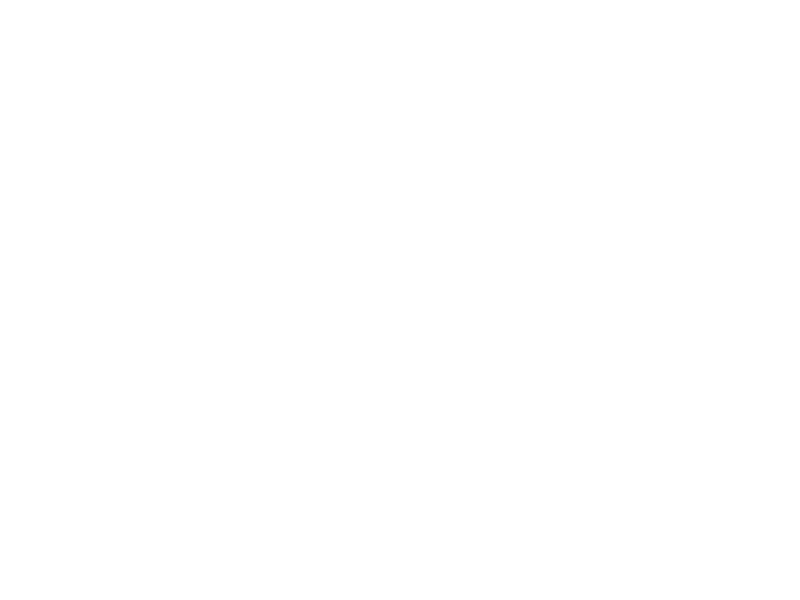

Left:  49754
Right:  50246
Collinear:  0


In [62]:
%matplotlib notebook
show_result(a,det_2, 10**-6)

<IPython.core.display.Javascript object>


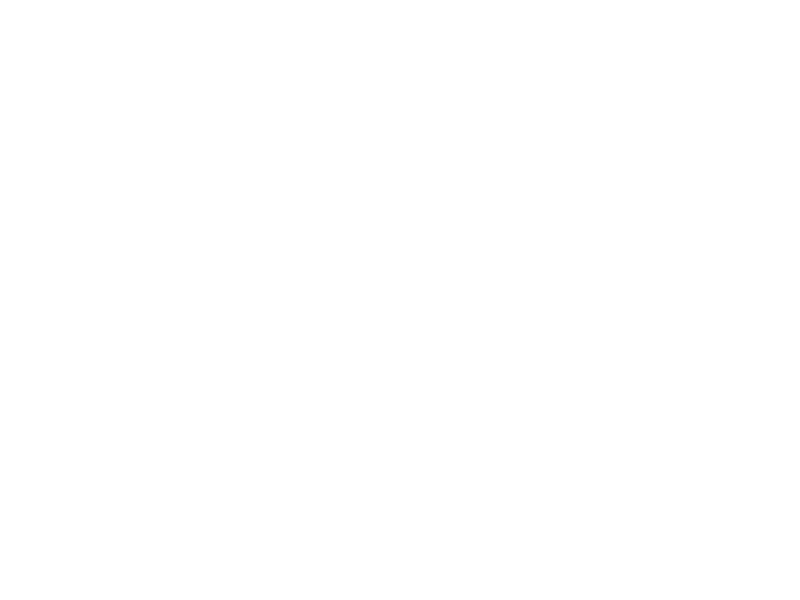

Left:  50126
Right:  49874
Collinear:  0


In [63]:
%matplotlib notebook
show_result(b,det_1, 10**-6)

<IPython.core.display.Javascript object>


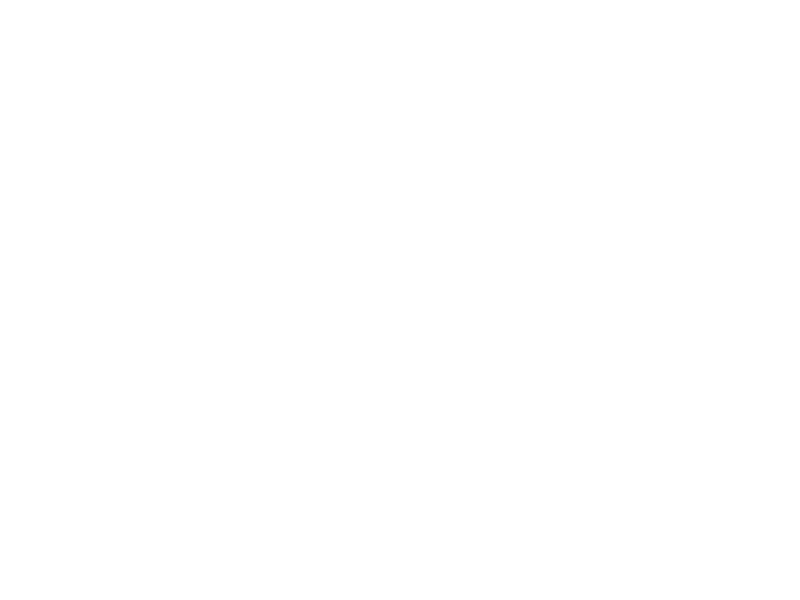

Left:  50122
Right:  49874
Collinear:  4


In [64]:
%matplotlib notebook
show_result(b,det_2, 10**-6)

<IPython.core.display.Javascript object>


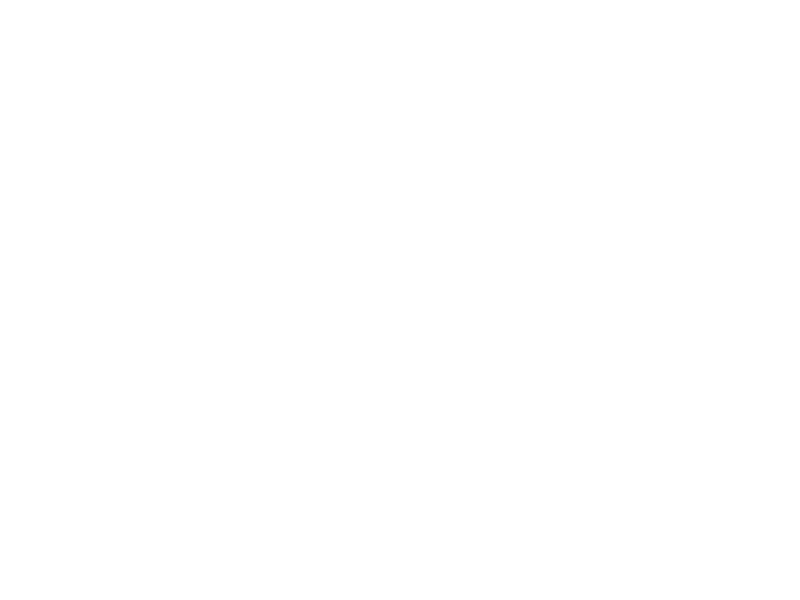

Left:  501
Right:  499
Collinear:  0


In [65]:
%matplotlib notebook
show_result(c,det_1, 10**-6)

<IPython.core.display.Javascript object>


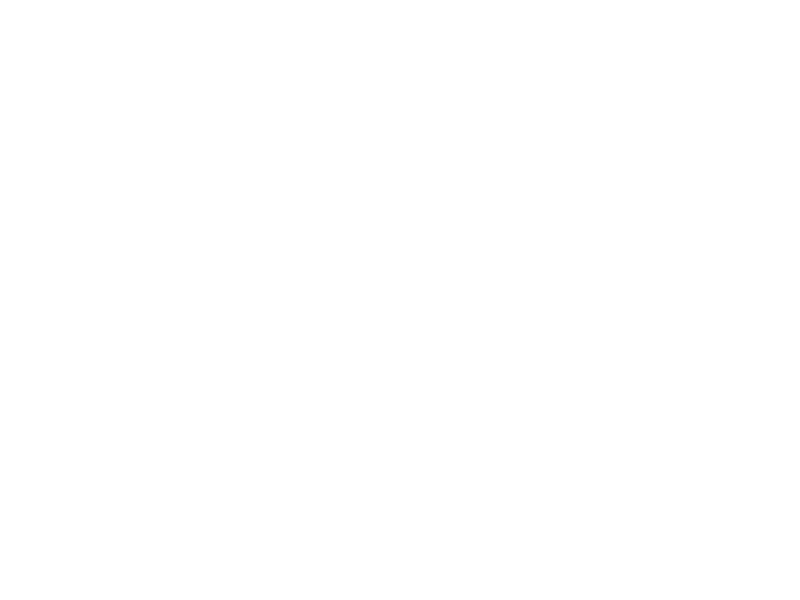

Left:  501
Right:  499
Collinear:  0


In [66]:
%matplotlib notebook
show_result(c,det_2, 10**-6)

<IPython.core.display.Javascript object>


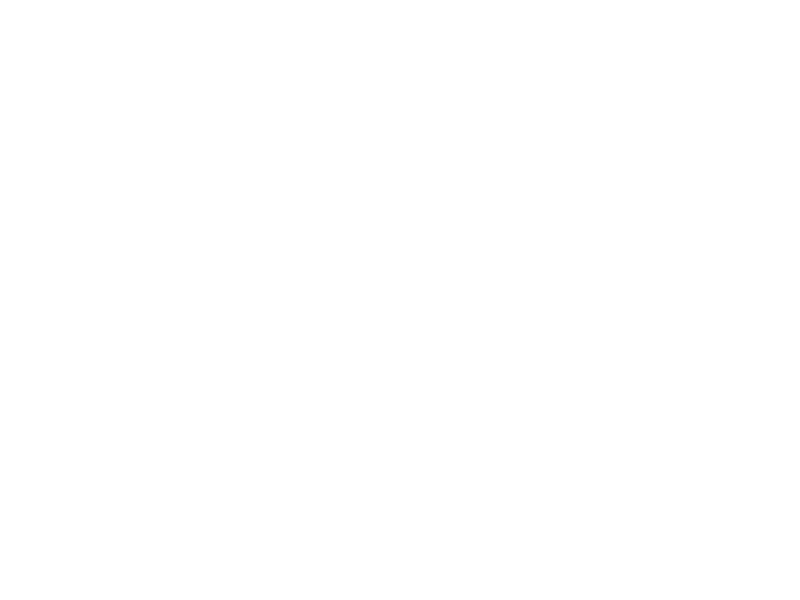

Left:  0
Right:  0
Collinear:  1000


In [67]:
%matplotlib notebook
show_result(d,det_1, 10**-6)

<IPython.core.display.Javascript object>


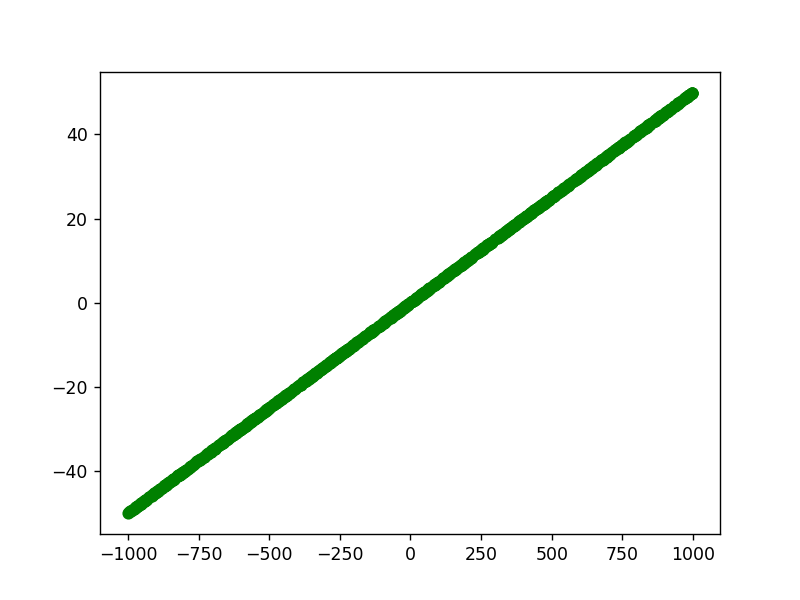

Left:  0
Right:  0
Collinear:  1000


In [68]:
%matplotlib notebook
show_result(d,det_2, 10**-6)